# Multiple Linear Regression

## Introduction

In this lesson, you'll be introduced to the multiple linear regression model. We'll start with an introductory example using linear regression, which you've seen before, to act as a segue into multiple linear regression.

## Objectives

You will be able to:

* Compare and contrast `simple linear regression` with `multiple linear regression`
* Interpret the `parameters of a multiple regression`

## Simple Linear Regression

You have previously learned about **simple linear regression** models. In these models, what you try to do is fit a linear relationship between **two variables**. Let's refresh our memory with the example below. Here, we are trying to find a relationship between seniority and monthly income. The monthly income is shown in units of &dollar;1000 USD.

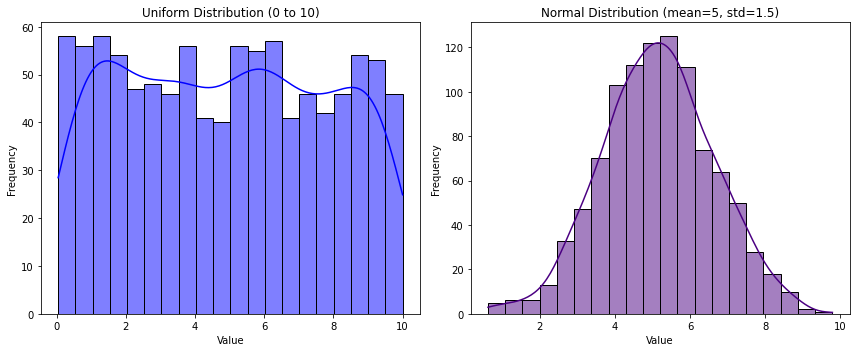

In [ ]:
### please-delete
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data
np.random.seed(42)  # For reproducibility
uniform_data = np.random.uniform(low=0, high=10, size=1000)
normal_data = np.random.normal(loc=5, scale=1.5, size=1000)

# Create plots
plt.figure(figsize=(12, 5))

# Uniform Distribution Plot
plt.subplot(1, 2, 1)
sns.histplot(uniform_data, bins=20, kde=True, color='blue')
plt.title("Uniform Distribution (0 to 10)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Normal Distribution Plot
plt.subplot(1, 2, 2)
sns.histplot(normal_data, bins=20, kde=True, color='indigo')
plt.title("Normal Distribution (mean=5, std=1.5)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show();

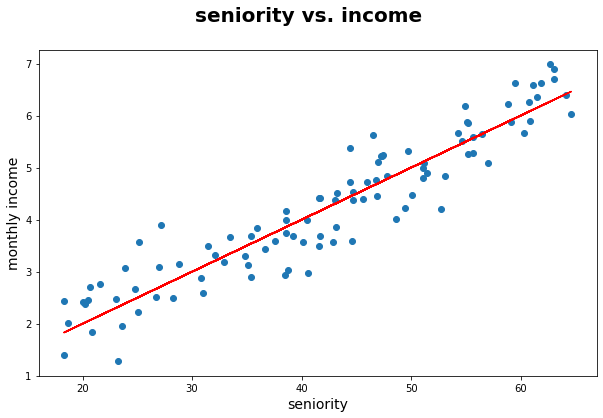

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic seniority and income data
np.random.seed(1234)
# sen represents seniority
sen = np.random.uniform(low=18, high=65, size=100)
income = np.random.normal(loc=(sen/10), scale=0.5)
sen = sen.reshape(-1, 1)

# plot data and y = 0.1x regression line
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('seniority vs. income',  fontweight='bold', fontsize=20)
ax.scatter(sen, income)
ax.plot(sen, sen/10, c='red')
ax.set_xlabel('seniority', fontsize=14)
ax.set_ylabel('monthly income', fontsize=14);

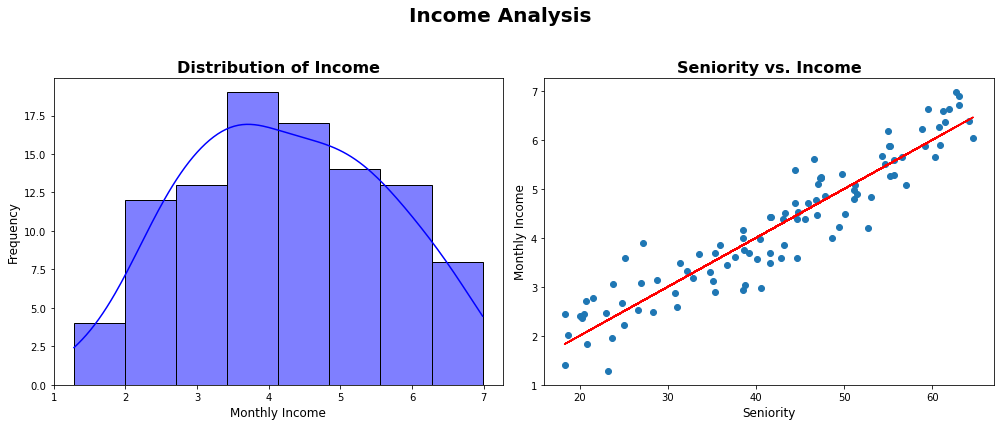

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# generate synthetic seniority and income data
np.random.seed(1234)
sen = np.random.uniform(low=18, high=65, size=100)
income = np.random.normal(loc=(sen/10), scale=0.5)
sen = sen.reshape(-1, 1)

# create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Income Analysis', fontweight='bold', fontsize=20)

# LEFT: Histogram / KDE of income
sns.histplot(income, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Income', fontweight='bold', fontsize=16)
axes[0].set_xlabel('Monthly Income', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# RIGHT: Scatter plot with regression line
axes[1].scatter(sen, income)
axes[1].plot(sen, sen/10, c='red')
axes[1].set_title('Seniority vs. Income', fontweight='bold', fontsize=16)
axes[1].set_xlabel('Seniority', fontsize=12)
axes[1].set_ylabel('Monthly Income', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout to fit suptitle


## "Controlling For" Other Variables with Multiple Regression

If you are able to set up an ***experiment*** with a randomized control group and intervention group, that is the "gold standard" method for statistical controls. If you see a spurious result from that kind of analysis, it is most likely due to bad luck rather than anything wrong with your setup. An experiment doesn't necessarily explain the underlying _mechanism_ for why a given independent variable impacts a given dependent variable, but you can be more confident that the causal relationship exists.

However if you are analyzing a "naturally-occurring" dataset of non-experimental ***observations***, more sophisticated domain knowledge and models are needed to help you interpret the data. You have a much higher risk of [spurious correlations](https://hbr.org/2015/06/beware-spurious-correlations) -- seemingly causal relationships between variables that are not legitimately related:

<img src="https://hbr.org/resources/images/article_assets/2015/05/F1506Z_VS_BEWARESPURIOUSCORRELATIONS-1.png" width=600 />

There are two kinds of spurious correlations:

1. Variables that seem to be related due to ***random*** (bad) luck
2. Variables that are not directly related, but are both impacted by ***confounding*** variables

The ***statistical significance tests*** we use are intended to flag the first type of spurious correlation. There is no way to prevent them completely, but you can use a smaller alpha value (set a lower tolerance for false positives) if you want to reduce the risk of them.

For the second type of spurious correlation, we can work around this issue by **identifying the confounding variable and including it in our model**.

A classic confounding variable example is:

* $y$: number of shark attacks
* $x$: ice cream sales

We might perform a regression analysis and find that there is a statistically significant relationship between ice cream sales and shark attacks! But how would ice cream sales be causing shark attacks? Well, the ice cream probably isn't actually causing them. Instead, a higher temperature is probably causing people to buy more ice cream, as well as causing people to go to the beach and have run-ins with sharks.

If we collect temperature data and create a new model:

* $y$: number of shark attacks
* $x_1$: ice cream sales
* $x_2$: daily high temperature

Then we would probably find that daily high temperature actually explains this target variable, and ice cream sales are no longer statistically significant.

## The Math of Multiple Regression

Let's return to our monthly income example.

Our original model was essentially:

$$\text{estimated monthly income} = \mathrm{slope} * \mathrm{seniority} + \mathrm{intercept} $$

Then if we added in years of education as a predictor, it would look something like this:

$$\text{estimated monthly income} = \mathrm{slope}_\mathrm{seniority} * \mathrm{seniority} + \mathrm{slope}_\mathrm{education} * \mathrm{years\_of\_education}  + \mathrm{intercept} $$

Instead of having one slope and one intercept, we now have two slopes and an intercept. But where do those slope values come from?

Essentially, each variable you add is adding a ***dimension*** to the matrix of X values. So instead of finding the best-fit for a ***line*** like in simple linear regression, now we're finding the best-fit for a ***plane***:

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/multiple_reg.png" width="500">

$\mathrm{slope}_\mathrm{seniority}$ represents the slope in the direction of the axis associated with seniority, and $\mathrm{slope}_\mathrm{education}$ represents the slope in the direction of the axis associated with years of education.

To write this with more standard variable names, we have:

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 $$

| Variable        | Meaning in This Context                                                                   |
| :-------------: | :---------------------------------------------------------------------------------------- |
| $\hat{y}$       | predicted monthly income                                                                  |
| $\hat{\beta_0}$ | predicted value of monthly income if **both** seniority and years of education are 0&#42; |
| $x_1$           | seniority                                                                                 |
| $\hat{\beta_1}$ | predicted change in monthly income associated with an increase of 1 in seniority          |
| $x_2$           | years of education                                                                        |
| $\hat{\beta_2}$ | predicted change in monthly income associated with an increase of 1 in years of education |

&#42;_As more variables are added, the intercept can get increasingly nonsensical/hard to interpret._

Note that we would **not** expect $\hat{\beta_1}$ to be exactly the same as $\mathrm{slope}$ in our original equation. This is because some of the variance in monthly income is now being explained by education. While you can still use the "script" of

> an increase of 1 in `independent variable` is associated with a change of `slope` in `dependent variable`,

you may want to add the phrase "all else being equal", or "controlling for education", to indicate that these are not the only two variables involved in your analysis.

## Beyond Two Independent Variables

Multiple linear regression models are not restricted to two independent variables. You can theoretically add an indefinite number of variables. Once we move beyond two predictors, multiple linear regression generates a best-fit _hyperplane_.

When thinking of lines and slopes statistically, slope parameters associated with a particular predictor $x_i$ are often denoted by $\beta_i$. Extending this example mathematically, you would write a multiple linear regression model as follows:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

where $n$ is the number of predictors, $\beta_0$ is the intercept, and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.

Each of these additional predictors is adding another dimension to the analysis, so creating visualizations of models with more than two predictors becomes very difficult. So instead we will typically use ***partial regression plots*** that represent one predictor at a time. [This page](https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html) from StatsModels shows some examples.

## Summary

Congratulations! You have gained an initial understanding of a multiple linear regression model. Multiple regression models add additional dimensions of independent variables, each with their own slopes. This can be helpful for identifying confounding variables and avoiding spurious associations, although randomized controlled experiments are still the "gold standard". Parameter interpretation for multiple regression models is similar to interpretation for simple regression, except that there are more slopes to interpret and the intercept is when all predictors are zero, not just when a single predictor is zero.